
## Street Fight Mathematics

Street fight Mathematics is a collection of techniques to make 'guesstimations' of results, solving problems without doing a mathematical proof or finding analytical or exact solutions.



---



Question: What are Stirling numbers of second kind?

That's easy: wikipedia,

In [ ]:
from IPython.display import IFrame

IFrame(src='https://en.wikipedia.org/wiki/Stirling_numbers_of_the_second_kind', width=800, height=400)

or Wolfram World,

In [ ]:
from IPython.display import IFrame

IFrame(src='https://mathworld.wolfram.com/StirlingNumberoftheSecondKind.html', width=1000, height=400)



---



Question: What is the next number in the series?

    1, 5, 12, 22, 35, 51, 70, 92, ?

Well, there might be many answers, but the best place to quickly find solutions is The On-Line Encyclopedia of Integer Sequences ([OEIS](https://oeis.org/)).

The site will return sequence [A000326](https://oeis.org/A000326): Pentagonal Numbers $a(n) = n*(3n-1)/2$.

In [ ]:
def A000326(n):
   return [int(i*(3*i-1)/2) for i in range(1,n)]

A000326(10)



---



Question: What is $0.601907230197$? This is a typical problem after a simulation outputs a strange number like this.

We can install [RIES](https://mrob.com/pub/ries/), which states on its website: _Find Algebraic Equations, Given Their Solution_

In [35]:
import requests

code = requests.get('https://mrob.com/pub/ries/src/ries.c.txt').text
with open('ries.c', 'w') as f:
  f.write(code)

!gcc ries.c -lm -o ries

In [36]:
import subprocess

def find_formula(n):
  proc = subprocess.run(f'./ries {n}', shell=True, capture_output=True, text=True)
  print(proc.stdout)

In [37]:
find_formula(0.601907230197)


   Your target value: T = 0.601907230197                         mrob.com/ries

                  1/x^2 = e                      for x = T + 0.00462343  {47}
               tanpi(x) = -pi                    for x = T - 0.00381397  {52}
               tanpi(x) = -3                     for x = T + 0.000509152 {53}
             sqrt(pi x) = e^(1/pi)               for x = T - 0.00027571  {76}
             tanpi(x)^2 = 6+pi                   for x = T - 0.000233848 {76}
              x sqrt(x) = 1/(pi-1)               for x = T - 2.88349e-05 {79}
             sinpi(x)^2 = cospi(1/7)             for x = T - 5.96059e-06 {75}
        sqrt(-cospi(x)) = atan2(pi,5)            for x = T - 3.00554e-06 {84}
            sinpi(x^pi) = phi/e                  for x = T + 1.60878e-06 {87}
             x+tanpi(x) = -(sqrt(2)+1)           for x = T - 1.47204e-06 {93}
                  1/x^3 = 6-sqrt(2)              for x = T - 1.15774e-06 {88}
              e^(1/x)-2 = 1/8+pi                 for x = T + 

Or use the [inverse symbolic calculator](http://wayback.cecm.sfu.ca/projects/ISC/ISCmain.html).

> _Unfortunately, the site seems down for a long time already..._

In this example, the ISC stated this number is the value `BesselK(1,1)`.

Of course, that leads to another question: what is the BesselK function? Well, check Wikipedia or Wolfram World!



---



Question: What is the Taylor series for $\arcsin(x)$?

There are powerful mathematical software applications, like Mathematica and Maple that are able to perform symbolic computations. There is also Matlab for numerical computations. [Wolfram Alpha](https://www.wolframalpha.com/) is an online tool based on Mathematica.

Python also has very good libraries to perform math and scientific computations. You should learn to explore the APIs of `numpy`, `scipy` and `sympy`.

In [25]:
from sympy import Symbol, series, asin

x = Symbol('x')
series(asin(x), x0=0, n=10)

x + x**3/6 + 3*x**5/40 + 5*x**7/112 + 35*x**9/1152 + O(x**10)

Searching the internet, we also find an exact answer,

$$\arcsin x = \displaystyle x + \frac 1 2 \frac {x^3} 3 + \frac {1 \times 3} {2 \times 4} \frac {x^5} 5 + \frac {1 \times 3 \times 5} {2 \times 4 \times 6} \frac {x^7} 7 + \cdots$$

In [ ]:
from sympy import cos

series(asin(cos(x)), x0=0, n=20)




---



Another useful website is [StackExchange](https://stackexchange.com/). It includes many expert [communities](https://stackexchange.com/sites#), some related to CompSci, Stats and Math:

+ [Stack Overflow](https://stackoverflow.com/) - computer science and programming related questions

+ [Mathematics](https://math.stackexchange.com/) - math related questions

+ [Cross Validated](https://stats.stackexchange.com/) - statistics related questions



---



Let's check a more complex example.

Suppose $p(x)$ is a polynomial of degree $\leq n$ bounded in $[-1,+1]$ for $x=[-1,+1]$.

What is the largest $p'(0)$ possible?

Without knowing enough Math and not knowing how to google for the answer, can we apply Street Fight Mathematics?

Let's start by trying to find a solution with a small $n$, say $n=3$.

So, $p(x) = a + bx + cx^2 + dx^3$

If we select a valid value for $x$, say $x=0.2$, we have a constraint to satisfy:

$$-1 \leq a + 0.2b + 0.04c + 0.008d \leq +1$$

The expression $p'(0)$ is $$p'(x) = b + 2cx + 3dx^2$$

and since the domain of $x$ is less than $1$, we would like to maximize $b$ (the other variables contribute much less).

So what? Well, if we collect 10000 random values for $x$, we will have 20000 constraints. The result of maximizing $b$ for all those contraints will, surely, get us very close to its optimal value.

In [38]:
import numpy as np

np.random.seed(123)

size = 10000
xs = np.random.uniform(-1,1,size)  # generate random values for x in [-1,+1]
xs = xs.reshape(size,1)            # make it a vector

def polyCoeff(x):
  return np.array([np.array([1]), x, x**2, x**3])

# A is a matrix of dimension 10000x4 defining the constraints' values
A = np.apply_along_axis(polyCoeff, 1, xs).reshape(size,4)
b = np.ones(size)

This is a linear programming problem, so let's CVX it!

In [39]:
from cvxpy import *

coeffs = Variable(4) # for n=3 there are 4 coefficients

objective   = Maximize( coeffs[1] )
constraints = [A @ coeffs >= -b, A @ coeffs <= b]
problem     = Problem(objective, constraints)

And the answer is:

In [40]:
problem.solve()

print("Maximal b value:", problem.value)
print("Coefficients values:", np.round(coeffs.value,2))

Maximal b value: 3.0005335538526223
Coefficients values: [ 0.  3. -0. -4.]


So, the answer for $b$ is almost $3$. Probably it is $3$, remember that we are just estimating the true value.

The proposed cubic polynomial is $p(x) = 3x - 4x^3$

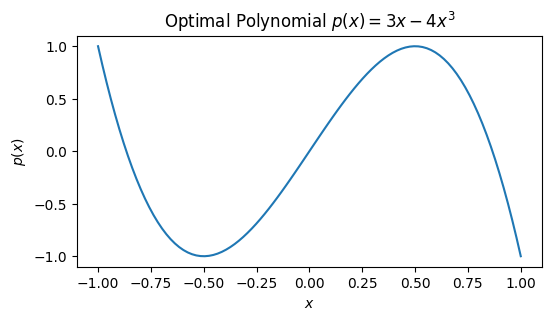

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,3))
ax.set_title('Optimal Polynomial $p(x) = 3x - 4x^3$');
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

xs = np.linspace(-1, 1, 100)
p  = np.poly1d([-4, 0, 3, 0])
ax.plot(xs, p(xs));

Ok, we are on! Let's solve the problem for $n=1,2,3,\ldots$

In [43]:
## put all previous code in a function
def findBestPoly(n):
  size = 10000
  xs = np.random.uniform(-1,1,size)  # generate random values for x in [-1,+1]
  xs = xs.reshape(size,1)            # make it a vector

  def polyCoeff(x):
    one = np.array([[1]])
    cs  = np.array([x**i for i in range(1,n+1)])
    return np.concatenate((one, cs))

  A = np.apply_along_axis(polyCoeff, 1, xs).reshape(size,n+1)
  b = np.ones(size)

  coeffs = Variable(n+1) # for n=3 there are 4 coefficients

  objective   = Maximize( coeffs[1] )
  constraints = [A @ coeffs >= -b, A @ coeffs <= b]
  problem     = Problem(objective, constraints)

  problem.solve()
  return(coeffs.value)

In [54]:
for n in range(1,10):
  poly = np.round(findBestPoly(n))
  print(f'n = {n} --> {*map(int, poly),}')

n = 1 --> (0, 1)
n = 2 --> (-1, 1, 1)
n = 3 --> (0, 3, 0, -4)
n = 4 --> (0, 3, 0, -4, 0)
n = 5 --> (0, 5, 0, -20, 0, 16)
n = 6 --> (0, 5, 0, -20, 0, 16, 0)
n = 7 --> (0, 7, 0, -56, 0, 112, 0, -64)
n = 8 --> (0, 7, 0, -56, 0, 112, 0, -64, 0)
n = 9 --> (0, 9, 0, -120, 0, 432, 0, -576, 0, 256)


The polynomial for $2k$ is the same as $2k-1$ (with an exception for $n=2$), so let's skip repetitions.

The best polynomials are

$$\begin{array}{lcl}
  p_1(x) &=& 1x \\
  p_3(x) &=& 3x - 4x^3 \\
  p_5(x) &=& 5x - 20x^3 + 16x^3 \\
  p_7(x) &=& 7x - 56x^3 + 112x^5 - 64x^7 \\
  p_9(x) &=& 9x -120x^3 + 432x^5 - 576x^7 + 256x^9
\end{array}$$

The largest $b$ for $p'(0)$ seems equal to the polynomial degree... But what about the other coefficients?

We can try inserting all coefficientes into OEIS...

In [31]:
from IPython.display import IFrame

IFrame(src='https://oeis.org/search?q=1%2C3%2C-4%2C5%2C-20%2C16%2C7%2C-56&sort=&language=english&go=Search', width=1000, height=400)

Chebyshev polynomials?

In [32]:
from IPython.display import IFrame

IFrame(src='https://en.wikipedia.org/wiki/Chebyshev_polynomials', width=1000, height=400)

In the wikipage there is this sentence:

> The Chebyshev polynomials $T_n$ are polynomials with the largest possible leading coefficient, whose absolute value on the interval $[−1, 1]$ is bounded by $1$. They are also the "extremal" polynomials for many other properties

with a reference: Rivlin, Theodore J. (1974). "Chapter  2, Extremal properties". The Chebyshev Polynomials. Pure and Applied Mathematics, pp. 56–123

The mathematical connection was made. We could now advance in solving the initial problem analytically.



---



## Dimensional Analysis

In Computer Science it is usual to use types to check for operations compatibility. This technique was already known in Science for a long time:

> dimensional analysis is the analysis of the relationships between different physical quantities by identifying their base quantities (such as length, mass, time, and electric charge) and units of measure (such as miles vs. kilometres, or pounds vs. kilograms) and tracking these dimensions as calculations or comparisons are performed [...]
>
> Physical quantities that are of the same kind (also called commensurable) (e.g., length or time or mass) have the same dimension and can be directly compared to other physical quantities of the same kind [...]
>
> Any physically meaningful equation (and any inequality) will have the same dimensions on its left and right sides.

This is a useful technique to check comparisons like

<center>National Debt > 120% of GDP</center>

Do this equation makes physical sense?

No, since national debt is in Euros, and GDP is in Euros/Year.

Sometimes dimensional analysis can greatly ease our work by removing incompatible options.

Consider that we already know Newton's law of universal gravitation,

$$\hbox{force} = {Gm_1m_2\over r^2}$$

and would wish to find the equation that relates a planet's year $T$, given its orbit radius $r$ and mass of the Sun $M$ (assume here that the planet's mass is irrelevant).

The equation would have this abstract relationship,

$$T(r) \sim G^x r^y M^z$$

We know that the units of $G$ are $m^3 kg^{−1} s^{−2}$ (since force comes in $m~kg~s^{-2}$) and $T$ is given in seconds.

+ $x$ must be $-1/2$ so that the seconds are compatible, ie, $s^{{-2}^{1/2}} = s$

+ that makes the units of $G^{-1/2}$, $m^{-3/2}kg^{1/2} s$

+ since $r$ comes in meters, $y$ must be $3/2$ so that both exponents for distance cancel each other.

+ since $M$ comes in kilograms, $z$ must be $-1/2$ so that both exponents for mass cancel each other.

That is

$$T \sim \frac{r^{3/2}}{G^{1/2}M^{1/2}} = \sqrt{ \frac{r^3}{GM}}$$

We don't know exactly the equation because we don't know the constant of proportionality. But this is a sanity check for the formal proof.

Btw, the [real formula](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion#Third_law) is

$$T \approx \sqrt{ \frac{4\pi^2 r^3}{GM}}$$

and is known as the third of Kepler's laws of planetary motion.

## References

+ [Street Fighting Mathematics](https://www.youtube.com/watch?v=qP4XEZ54eSc), Ryan O'Donnell (most of the notebook is the Python implementation of this lecture)

+ [Street Fighting Mathematics MOOC](https://www.edx.org/course/street-fighting-math)